# Linear Model

In [17]:
import mglearn 


/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


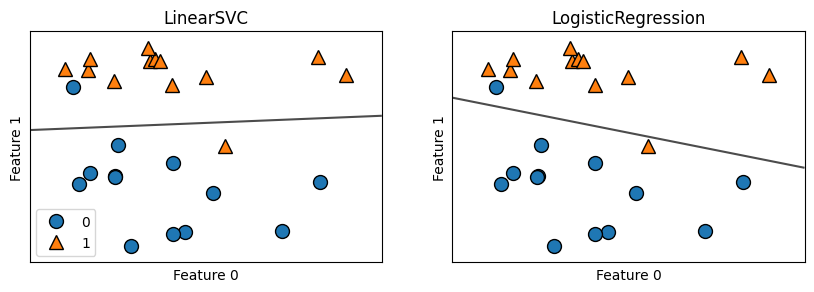

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

X,y = mglearn.datasets.make_forge()

fig,axes = plt.subplots(1,2,figsize = (10,3))

for model, ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps =0.5,ax = ax ,alpha = .7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

axes[0].legend()


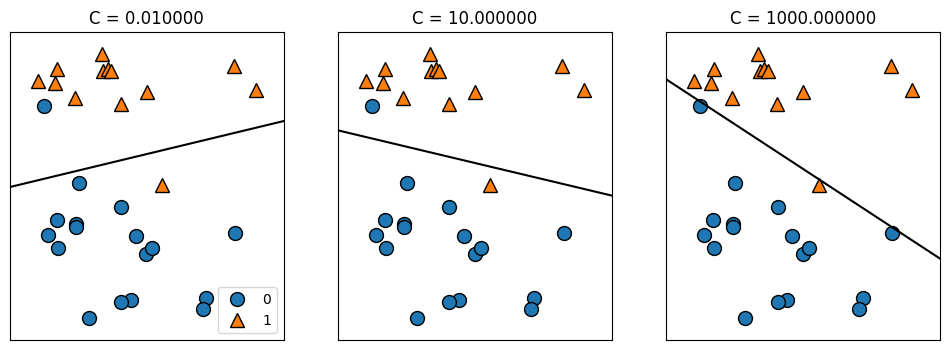

In [19]:
mglearn.plots.plot_linear_svc_regularization()

# Analyzing logistic regression on breast cancer dataset


In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg = LogisticRegression(solver='liblinear').fit(X_train,y_train)
print("Training set score : {:.2f}".format(logreg.score(X_train,y_train)))
print("Test set score : {:.2f}".format(logreg.score(X_test,y_test)))


Training set score : 0.95
Test set score : 0.96


In [21]:
logreg100 = LogisticRegression(C=100,solver='liblinear').fit(X_train,y_train)
print("Training set score : {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score : {:.3f}".format(logreg.score(X_test,y_test)))

Training set score : 0.953
Test set score : 0.958


In [22]:
logreg001 = LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
print("Training set score : {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score : {:.3f}".format(logreg.score(X_test,y_test)))

Training set score : 0.953
Test set score : 0.958


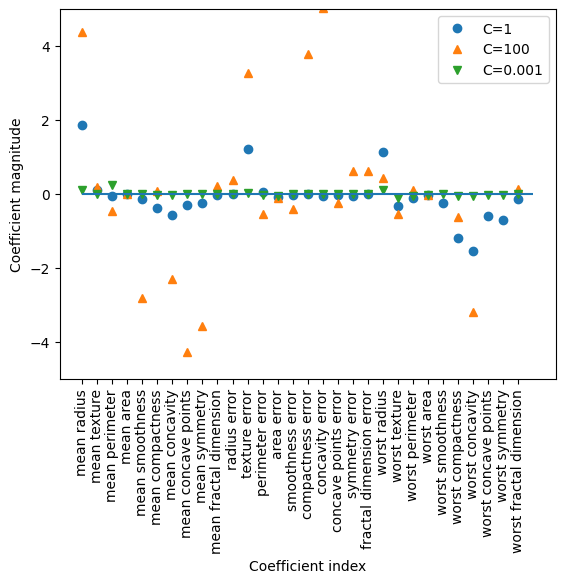

In [23]:
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg001.coef_.T,'v',label="C=0.001")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C= 0.001
Test accuracy of l1 logreg with C= 0.001
Training accuracy of l1 logreg with C= 1.000
Test accuracy of l1 logreg with C= 1.000
Training accuracy of l1 logreg with C= 100.000
Test accuracy of l1 logreg with C= 100.000


/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


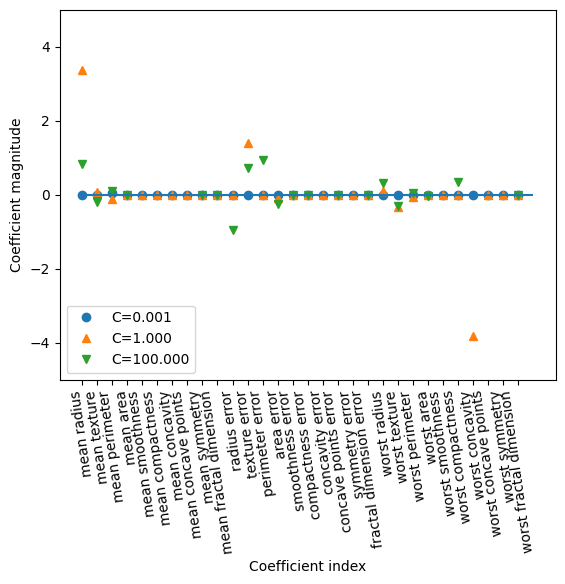

In [24]:
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(C=C,penalty="l1",solver = 'liblinear').fit(X_train,y_train)
    print("Training accuracy of l1 logreg with C= {:.3f}".format(C,lr_l1.score(X_train,y_train)))
    print("Test accuracy of l1 logreg with C= {:.3f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label = "C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names,rotation = 98)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5,5)
plt.legend(loc=3)
    

# Linear Model for Multiclass classification


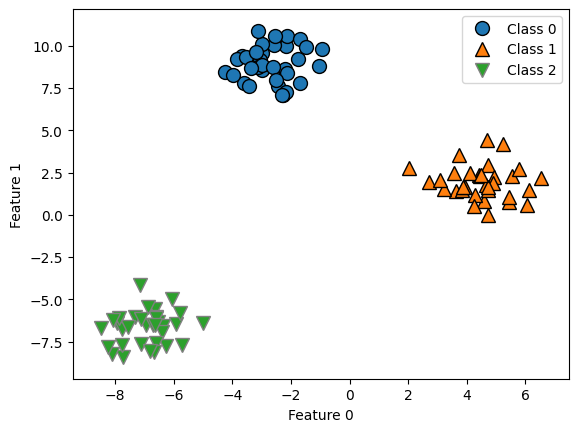

In [25]:
from sklearn.datasets import make_blobs 

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(["Class 0","Class 1","Class 2"])

In [26]:
linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape :",linear_svm.coef_.shape)
print("Intercept shape :",linear_svm.intercept_.shape)

Coefficient shape : (3, 2)
Intercept shape : (3,)


/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


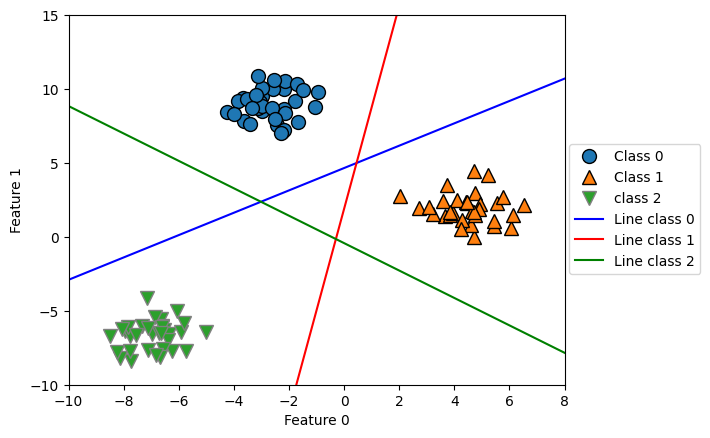

In [27]:
import numpy as np


mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0] + intercept)/ coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0','Class 1','class 2','Line class 0','Line class 1','Line class 2'],loc=(1.01,0.3))

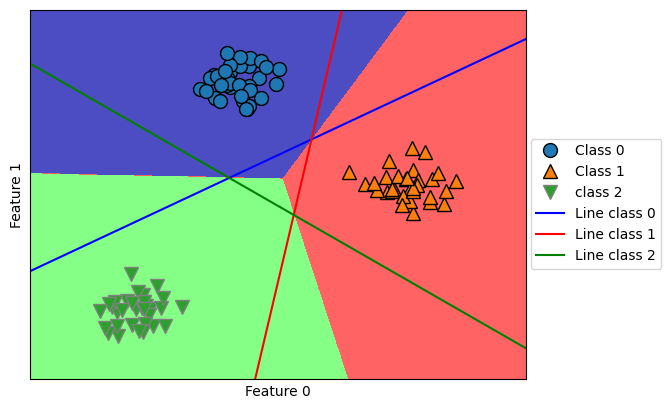

In [28]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef ,intercept ,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line * coef[0] + intercept)/coef[1], c= color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0','Class 1','class 2','Line class 0','Line class 1','Line class 2'],loc=(1.01,0.3))
    

# Naive bayes classifier


In [29]:
X = np.array([[0,1,0,1],
              [1, 0, 1, 1],
               [0, 0, 0, 1],
              [1, 0, 1, 0]
             ])

y = np.array([0,1,0,1])

In [30]:
np.unique(y)

array([0, 1])

In [31]:
for lab in np.unique(y):
    print(y==lab)

[ True False  True False]
[False  True False  True]


# Decision tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(random_state =0)
tree.fit(X_train,y_train)
print("Accuracy on training set : {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set : {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set : 1.000
Accuracy on test set : 0.937


In [33]:
tree = DecisionTreeClassifier(max_depth = 4,random_state = 0)
tree.fit(X_train,y_train)

print("Accuracy on training set : {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set : {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set : 0.988
Accuracy on test set : 0.951


In [34]:
from sklearn.tree import export_graphviz 
export_graphviz(tree,out_file="tree.dot",class_names=["malignant","benign"],feature_names = cancer.feature_names,impurity=False,filled=True)

In [35]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [36]:
pip install graphviz



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
print("Feature importance :\n{}".format(tree.feature_importances_))

Feature importance :
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


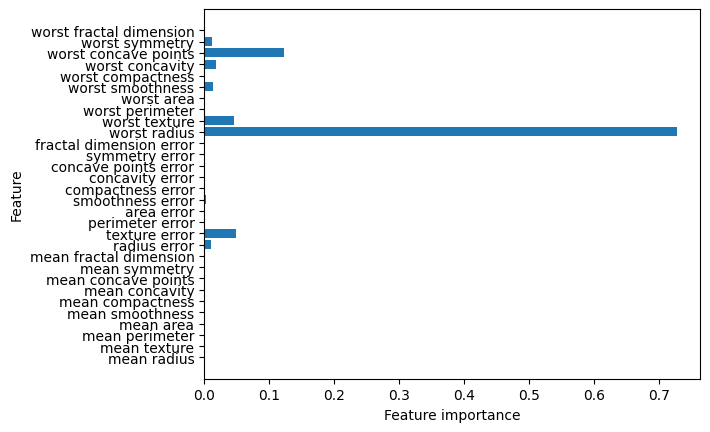

In [40]:
def plot_feature_importance_cancer(model):
    n_features= cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align="center")
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importance_cancer(tree)
    

Feature importances: [0. 1.]


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

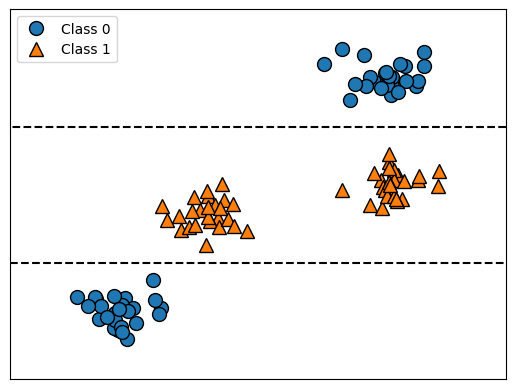

In [42]:
tree= mglearn.plots.plot_tree_not_monotone()
display(tree)